## **Yulu case study**

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Column Profiling:**

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:

1.   Clear, Few clouds, partly cloudy, partly cloudy
2.   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3.   Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4.   Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered



---



#**1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.**

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [235]:
df=pd.read_csv('/content/drive/MyDrive/bike_sharing.csv')

In [236]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


##a. Examine dataset structure, characteristics, and statistical summary.

In [237]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [239]:
df.shape

(10886, 12)

In [240]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

##b. Identify missing values and perform Imputation using an appropriate method.

In [241]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

##c. Identify and remove duplicate records.

In [242]:
df.duplicated().sum()

0

##d. Analyze the distribution of Numerical & Categorical variables, separately

In [243]:
#numerical variables

numericals_feature = ['weather', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

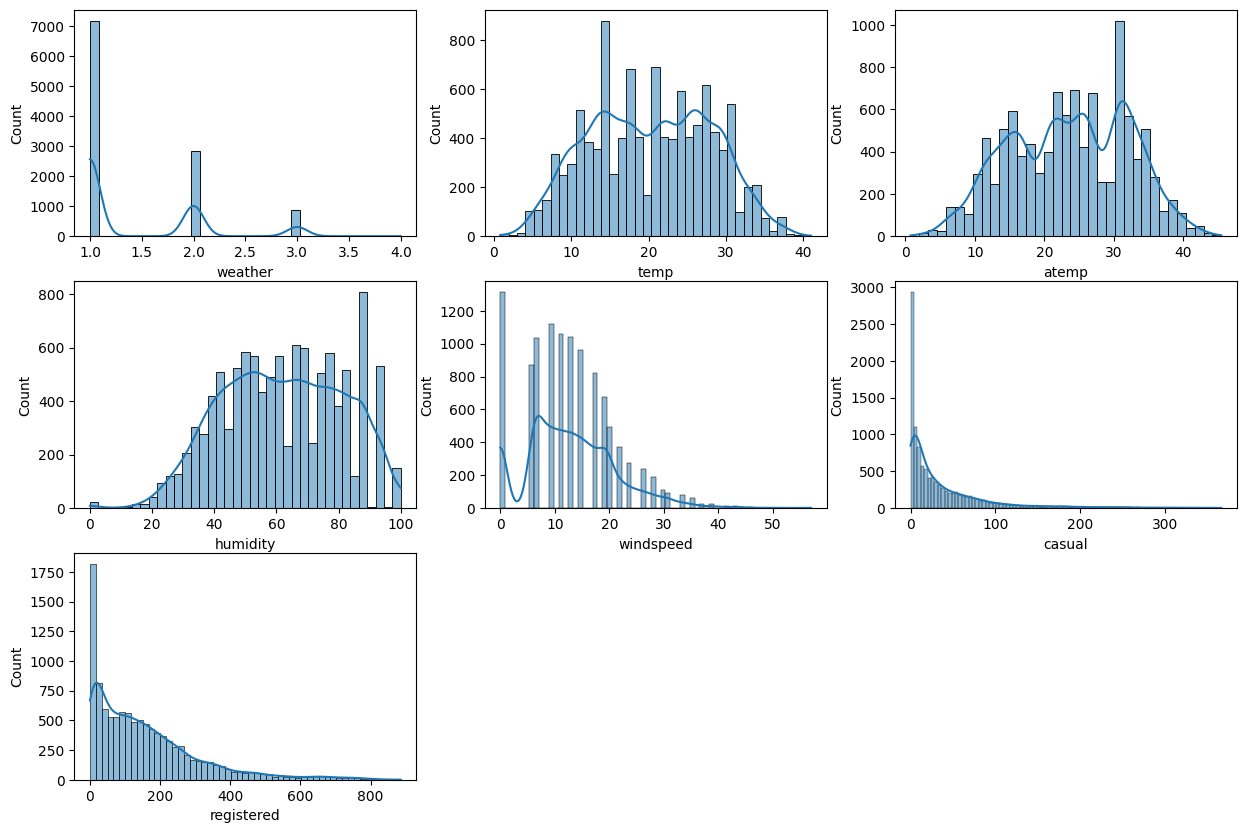

In [244]:
plt.figure(figsize=(15,10))
for i in range(1,len(numericals_feature)):
  plt.subplot(3,3,i)
  sns.histplot(df[numericals_feature[i-1]],kde=True)

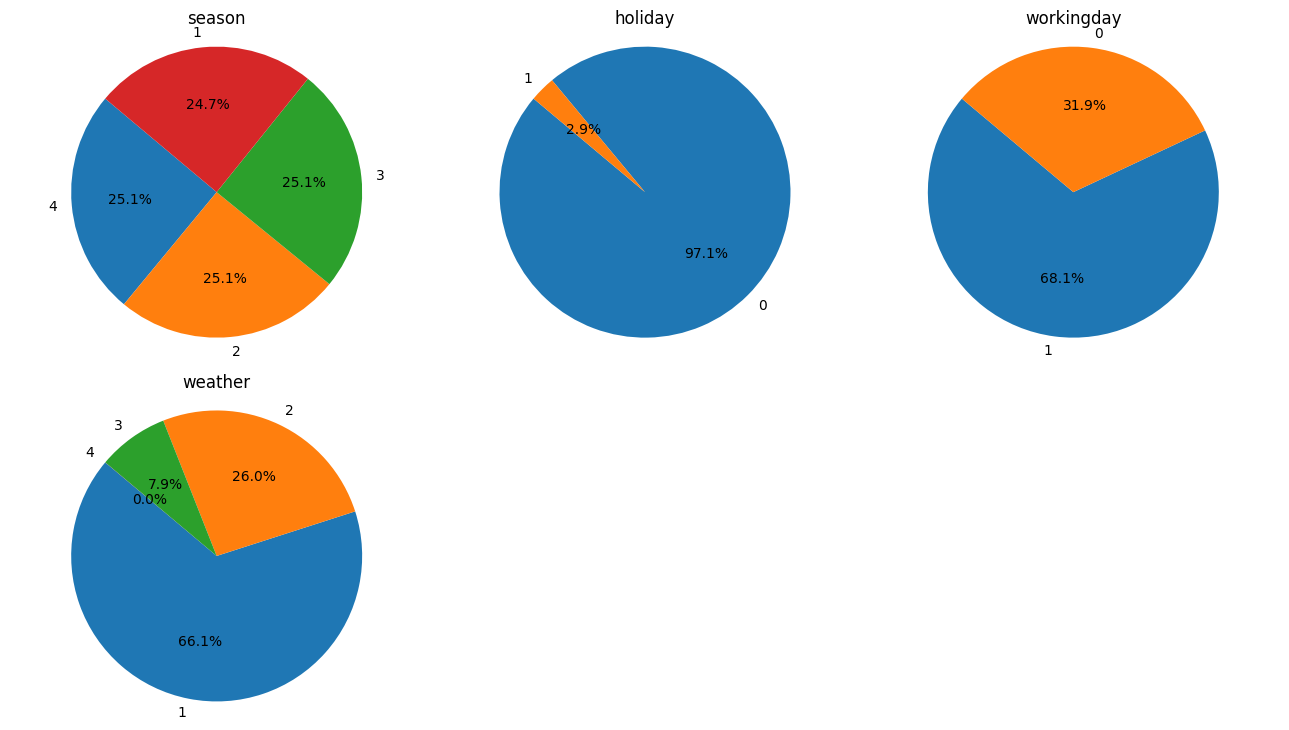

In [245]:
#categorical variables

cat_var=['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(13, 11))

for i in range(len(cat_var)):
    plt.subplot(3, 3, i+1, aspect='equal')
    plt.pie(df[cat_var[i]].value_counts(), labels=df[cat_var[i]].value_counts().index, autopct='%1.1f%%', startangle=140)
    plt.title(cat_var[i])
    plt.axis('equal')

plt.tight_layout()
plt.show()

##e. Check for Outliers and deal with them accordingly.

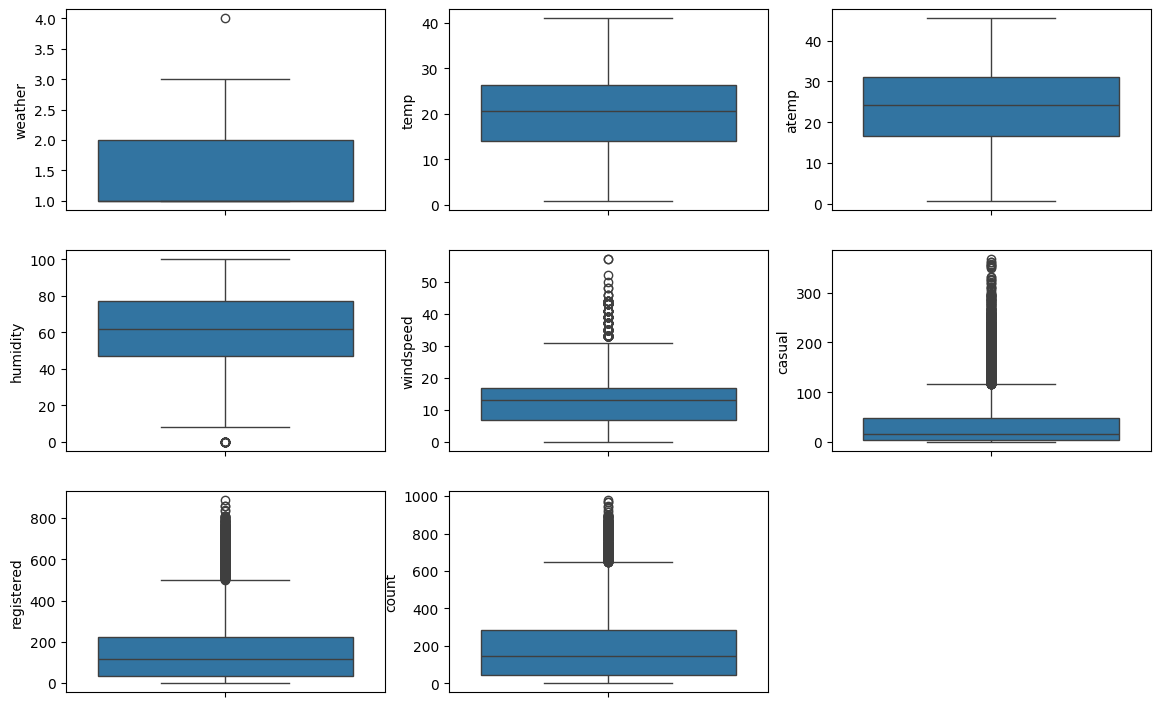

In [246]:
numericals_feature = ['weather', 'temp','atemp', 'humidity', 'windspeed','casual','registered','count']
plt.figure(figsize=(14,12))

for i in range(1,len(numericals_feature)+1):
  plt.subplot(4,3,i)
  sns.boxplot(df[numericals_feature[i-1]])

In [247]:
num_feat =['weather', 'temp','atemp', 'humidity', 'windspeed','casual','registered']
for col in num_feat:
    percentiles = df[col].quantile([0.05,0.95]).values
    df[col] = np.clip(df[col], percentiles[0],percentiles[1])

**Insights:**

* There are totally 10886 rows and 12 columns in the data

* The data does not contain any nulls, thus no need of handling the missing data.

* Outliers are observed in windspeed and bike rental counts (casual, registered, and total).






---



#**2. Try establishing a Relationship between the Dependent and Independent Variables.**

In [248]:
corr_df = df[numericals_feature].corr()
corr_df

,weather,temp,atemp,humidity,windspeed,casual,registered,count
weather,1.000000,-0.055393,-0.055679,0.414304,0.003858,-0.147281,-0.116783,-0.128694
temp,-0.055393,1.000000,0.985210,-0.058527,-0.013790,0.523195,0.331822,0.393492
atemp,-0.055679,0.985210,1.000000,-0.039670,-0.047511,0.517228,0.328456,0.389314
humidity,0.414304,-0.058527,-0.039670,1.000000,-0.320708,-0.376588,-0.293735,-0.323683
windspeed,0.003858,-0.013790,-0.047511,-0.320708,1.000000,0.109439,0.107767,0.108861
casual,-0.147281,0.523195,0.517228,-0.376588,0.109439,1.000000,0.589091,0.723516
registered,-0.116783,0.331822,0.328456,-0.293735,0.107767,0.589091,1.000000,0.962145
count,-0.128694,0.393492,0.389314,-0.323683,0.108861,0.723516,0.962145,1.000000


In [249]:
# corrrelation analysis

correlation_matrix = df[["atemp", "temp", "humidity", "windspeed", "casual", "registered", "count"]].corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df

,atemp,temp,humidity,windspeed,casual,registered,count
atemp,1.000000,0.985210,-0.039670,-0.047511,0.517228,0.328456,0.389314
temp,0.985210,1.000000,-0.058527,-0.013790,0.523195,0.331822,0.393492
humidity,-0.039670,-0.058527,1.000000,-0.320708,-0.376588,-0.293735,-0.323683
windspeed,-0.047511,-0.013790,-0.320708,1.000000,0.109439,0.107767,0.108861
casual,0.517228,0.523195,-0.376588,0.109439,1.000000,0.589091,0.723516
registered,0.328456,0.331822,-0.293735,0.107767,0.589091,1.000000,0.962145
count,0.389314,0.393492,-0.323683,0.108861,0.723516,0.962145,1.000000


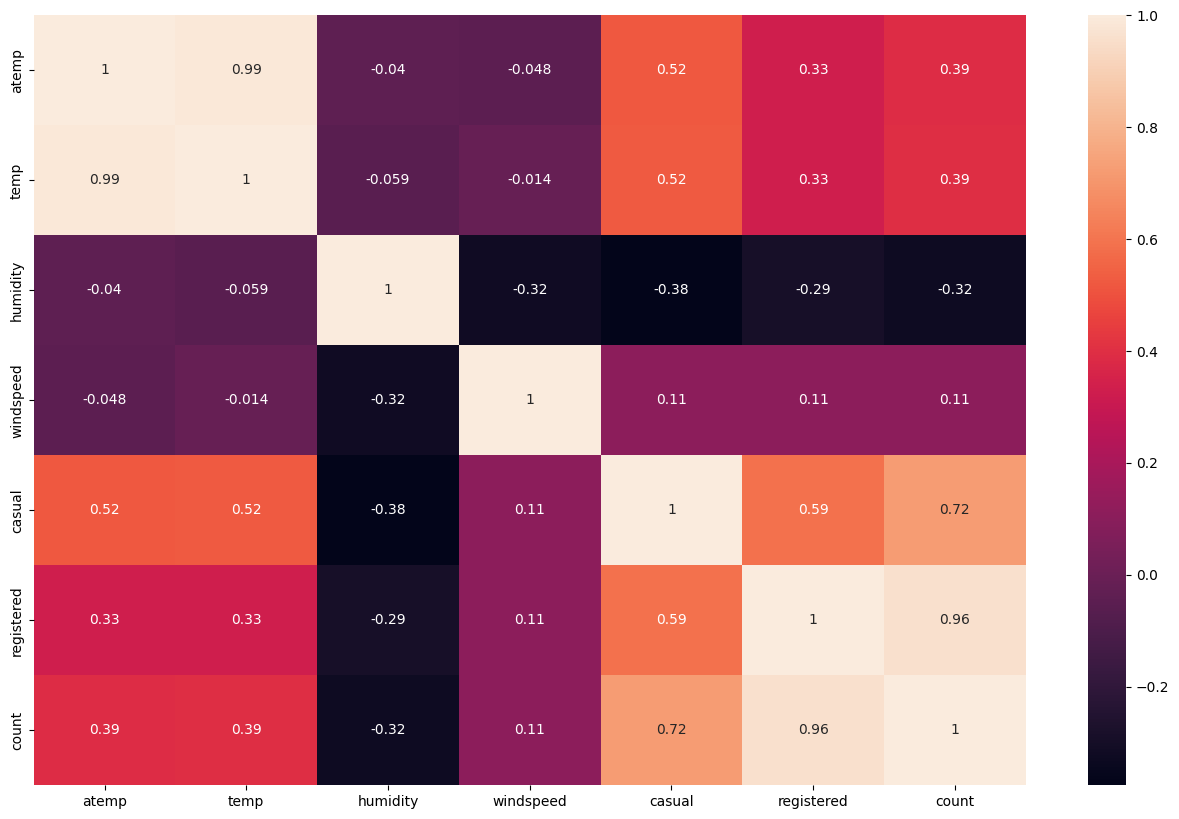

In [250]:
# correlation chart

plt.figure(figsize = (16, 10))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

**Insights:**
* Temperature (Temp and Atemp): Both temperature and apparent temperature have a strong positive correlation with bike rentals, indicating that warmer weather leads to increased rentals.

* Humidity: Higher humidity shows a moderate negative correlation with bike rentals, suggesting a decrease in rentals during humid conditions.


* Casual and Registered Rentals: Both types of rentals show strong correlations with each other and with total bike rentals, indicating their significant impact on overall rental numbers.

* Total Bike Rentals (Count): The total count of bike rentals is highly correlated with both casual and registered rentals, emphasizing their joint influence on overall rental patterns.



---



#**3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

In [251]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,4,1


##a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

**Null Hypothesis (H0)**: Working day has No effect on number of electric cycles rented

**Alternate Hypothesis (H1)**: Working day has effect on number of electric cycles rented

In [252]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

##b. Select an appropriate test -

**2- Sample Independent T-test**

* 1 represents a day that is a weekday (Monday through Friday) and not a holiday.
* 0 represents a day that is either a weekend (Saturday or Sunday) or a holiday.

In [253]:
week_ends= df[df['workingday']==0]['count'].values
week_days= df[df['workingday']==1]['count'].values

np.var(week_ends), np.var(week_days)

(30171.346098942427, 34040.69710674686)

* The variances between the two groups are equal

##c. Set a significance level

**alpha=5%**

##d. Calculate test Statistics / p-value

In [254]:
from scipy.stats import ttest_ind

t_stat, pvalue = ttest_ind(week_days, week_ends)
t_stat, pvalue

(1.2096277376026694, 0.22644804226361348)

##e. Decide whether to accept or reject the Null Hypothesis.

In [255]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
  print('We have the sufficient evidence to say that working day has effect on the number of cycles being rented')
else:
  print ('Fail to Reject H0\n')
  print('We dont have the sufficient evidence to say that working day has effect on the number of cycles being rented')

Fail to Reject H0

We dont have the sufficient evidence to say that working day has effect on the number of cycles being rented




---



#**4. Check if the demand of bicycles on rent is the same for different Weather conditions?**

##a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

**Null Hypothesis (H0)**: There is no significant difference between demand of bicycles for different Weather conditions.


**Alternate Hypothesis (H1)**: There is a significant difference between demand of bicycles for different Weather conditions

##b. Select an appropriate test -

**One-way ANOVA test**

##c. Check assumptions of the test

* The population data should be normally distributed- The data is not normal as verified by Wilkin-Shapiro test and the qqplot.

* The data points must be independent- This condition is satisfied.

* Approximately equal variance within groups- This will be verified using Levene's test.

In [256]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     860
Name: count, dtype: int64

**i. Normality**

In [257]:
# skewness of weather

df.groupby('weather')['count'].skew()

weather
1    1.139857
2    1.294444
3    2.186900
Name: count, dtype: float64

In [258]:
# kurtosis test of weather

df.groupby('weather')['count'].apply(lambda x: x.kurtosis())

weather
1    0.964720
2    1.588430
3    6.007949
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Count'>

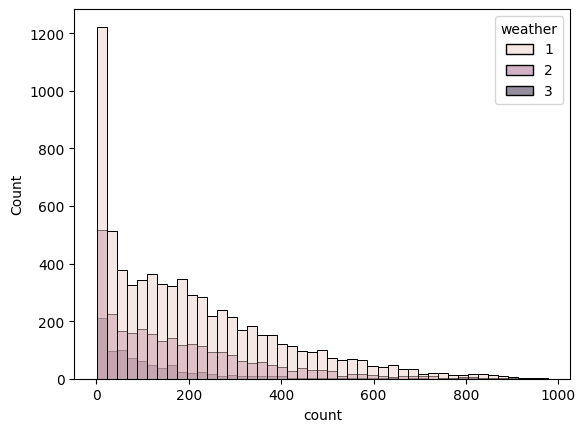

In [259]:
#histplot

sns.histplot(data = df, x = 'count', hue = 'weather')

**Levene's test**

Ho: The variances are equal.


Ha: The variances are not equal.

In [260]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']

levene_stat, p_val = levene(weather1, weather2, weather3)

p_val

5.684152685076933e-36

##d. Set a significance level and Calculate the test Statistics / p-value.

**alpha=5%**

##e. Decide whether to accept or reject the Null Hypothesis.

In [261]:
if p_val < 0.05:
  print('p_values is smaller than the significance level, Null hypothesis can be rejected.')
else:
  print('p_values is higher than the significance level, Null hypothesis can be accepted')


p_values is smaller than the significance level, Null hypothesis can be rejected.


**Anova test**

**Null Hypothesis (H0)**: There is no significant difference between demand of bicycles for different Weather conditions.


**Alternate Hypothesis (H1)**: There is a significant difference between demand of bicycles for different Weather conditions

In [262]:
from scipy.stats import f_oneway

anova_stat, p_val = f_oneway(weather1, weather2, weather3)

p_val

5.0317443194291675e-43

In [263]:
if p_val < 0.05:
  print('Reject the null Hypothesis, There is a significance difference for demand of bicycles for different weather conditions')
else:
  print('Fail to Reject the null Hypothesis, There is a no significance difference for demand of bicycles for different weather conditions')


Reject the null Hypothesis, There is a significance difference for demand of bicycles for different weather conditions


In [264]:
from scipy.stats import kruskal

kruskal_stat, p_val = kruskal(weather1, weather2, weather3)

p_val

3.593795391931839e-45

In [265]:
if p_val < 0.05:
  print('Reject the null Hypothesis\n  There is a significance difference for demand of bicycles for different weather conditions')
else:
  print('Fail to Reject the null Hypothesis\n  There is a no significance difference for demand of bicycles for different weather conditions')


Reject the null Hypothesis
  There is a significance difference for demand of bicycles for different weather conditions




---



#**5. Check if the demand of bicycles on rent is the same for different Seasons?**

##a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

**Null Hypothesis (H0)**: There is no significant difference between demand of bicycles for different seasons.


**Alternate Hypothesis (H1)**: There is a significant difference between demand of bicycles for different seasons.

##b. Select an appropriate test -

**One-way ANOVA test**

##c. Check assumptions of the test

**Normality**

In [266]:
# skewness of weather

df.groupby('season')['count'].skew()

season
1    1.888056
2    1.003264
3    0.991495
4    1.172117
Name: count, dtype: float64

In [267]:
# kurtosis test of weather

df.groupby('season')['count'].apply(lambda x: x.kurtosis())

season
1    4.314757
2    0.425213
3    0.699383
4    1.273485
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Count'>

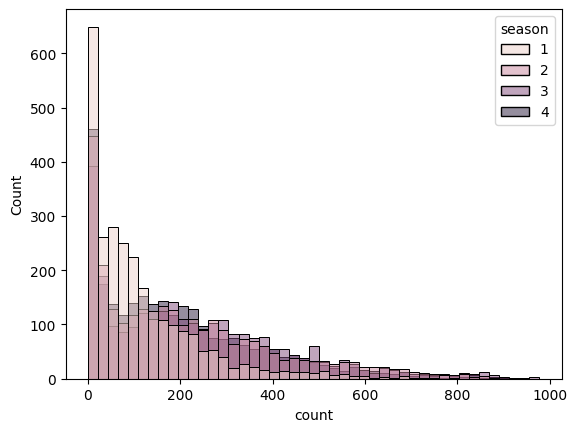

In [268]:
sns.histplot(data = df, x = 'count', hue = 'season')

**Levene's test**

**Ho**: The variances are equal.

**Ha**: The variances are not equal.

In [269]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

##d. Set a significance level and Calculate the test Statistics / p-value.

**alpha=5%**

In [270]:
from scipy.stats import levene

season1 = df[df['season'] == 1]['count']
season2 = df[df['season'] == 2]['count']
season3 = df[df['season'] == 3]['count']
season4 = df[df['season'] == 4]['count']

levene_stat, p_val = levene(season1, season2, season3,season4)

p_val

1.0147116860043298e-118

##e. Decide whether to accept or reject the Null Hypothesis.

In [271]:
if p_val < 0.05:
  print('p_values is smaller than the significance level, Null hypothesis can be rejected.')
else:
  print('p_values is higher than the significance level, Null hypothesis can be accepted')


p_values is smaller than the significance level, Null hypothesis can be rejected.


In [272]:
from scipy.stats import f_oneway

anova_stat, p_val = f_oneway(season1, season2, season3,season4)

p_val

if p_val < 0.05:
  print('Reject the null Hypothesis, There is a significance difference for demand of bicycles for different seasons')
else:
  print('Fail to Reject the null Hypothesis, There is a no significance difference for demand of bicycles for different seasons')


Reject the null Hypothesis, There is a significance difference for demand of bicycles for different seasons


In [273]:
from scipy.stats import kruskal

kruskal_stat, p_val = kruskal(season1, season2, season3,season4)

p_val


if p_val < 0.05:
  print('Reject the null Hypothesis, There is a significance difference for demand of bicycles for different seasons')
else:
  print('Fail to Reject the null Hypothesis, There is a no significance difference for demand of bicycles for different seasons')


Reject the null Hypothesis, There is a significance difference for demand of bicycles for different seasons




---



#**6. Check if the Weather conditions are significantly different during different Seasons?**

##a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

**Null Hypothesis (H0)**: Season and Weather are independent of each other.


**Alternate Hypothesis (H1)**:  Season and Weather are dependent on each other.

##b. Select an appropriate test -

**Chi-square test**

##c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns

In [274]:
contingency_table = pd.crosstab(df['weather'], df['season'])

contingency_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,212,224,199,225


##d. Set a significance level and Calculate the test Statistics / p-value.

**alpha=5%**

In [277]:
from scipy.stats import chi2_contingency

chi_stat, p_value, degree_of_freedom, exp_freq = chi2_contingency(contingency_table) # chi_stat, p_value, degree_of_freedom, expected value

print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("degree_of_freedom:",degree_of_freedom)
print("exp_freq:",exp_freq)

chi_stat: 46.09805776966069
p_value: 2.8304096630424604e-08
degree_of_freedom: 6
exp_freq: [[1774.54638986 1805.59764836 1805.59764836 1806.25831343]
 [ 699.25812971  711.49384531  711.49384531  711.75417968]
 [ 212.19548043  215.90850634  215.90850634  215.98750689]]


##e. Decide whether to accept or reject the Null Hypothesis.

In [276]:
if p_val < 0.05:
  print('Reject the null Hypothesis, we can conclude that Season and Weather are dependent on each other.')
else:
  print('Fail to Reject the null Hypothesis, we can conclude that Season and Weather are independent on each other.')


Reject the null Hypothesis, we can conclude that Season and Weather are dependent on each other.


##**Recommendations:**

* Since bike rentals are similar on working and non-working days, adjust bike deployment strategies from the proper availability of bikes throughtout the week.

* Think about using flexible pricing tactics that adapt to weather conditions. For example, altering rental fees on days with extreme weather to maximize earnings.

* Advertise the bikes differently in each season. For example, highlight summer promotions in June, July, and August when more people want to ride bikes.

* Adjust bike availability according to both the season and weather conditions to ensure bikes are accessible when needed. For instance, increase bike availability on sunny days during the summer season


